# Personal Key Indicators of Heart Disease
Source: https://www.kaggle.com/kamilpytlak/personal-key-indicators-of-heart-disease

In [21]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False)
set_nb_theme("oceans16")

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
%autonotify -a 30

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

plt.rcParams['figure.figsize'] = [16, 8]

## Helper Functions

In [4]:
def getRatio(df):
    df['ratio'] = df['Yes'] / (df['Yes'] + df['No'])
    return df

## Reading and viewing data

In [5]:
df = pd.read_csv("data/heart_2020_cleaned.csv")


df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
df.shape

(319795, 18)

## Data Exploration & Manipulation

I will quickly check for the structures and manipulate the dataframe if necessary

### NAs

In [7]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

So far so good, there's not any missing values

### Data Distributions

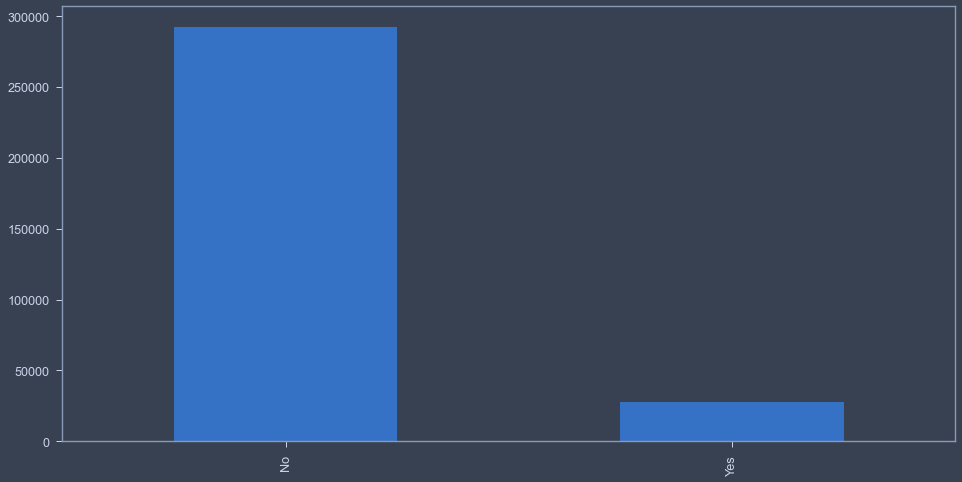

In [8]:
df.HeartDisease.value_counts().plot.bar()
plt.show()

#### BMI

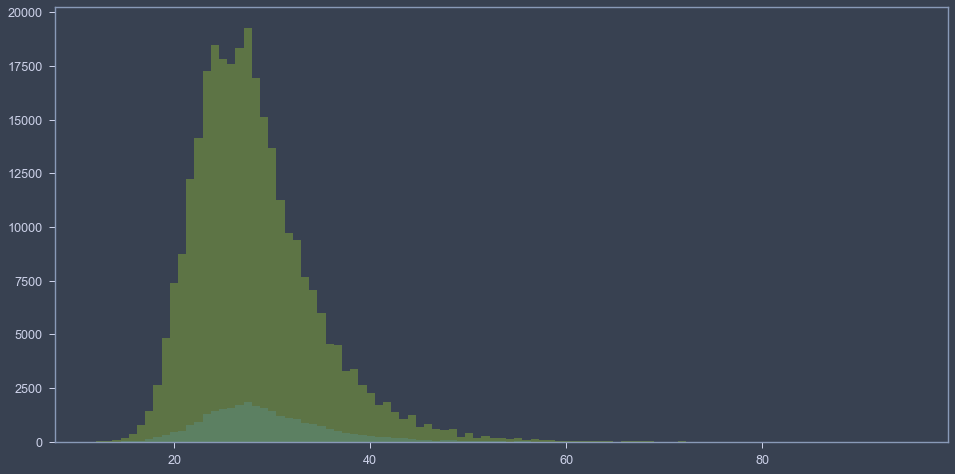

In [9]:
bins = np.linspace(df.BMI.min(), df.BMI.max(), 100)
plt.hist(df.BMI.loc[df.HeartDisease == "Yes"], bins, alpha=0.5, label="Heart disease: Yes")
plt.hist(df.BMI.loc[df.HeartDisease == "No"], bins, alpha=0.5, label="Heart disease: No")
plt.show()

It appears that there aren't too much relationship between BMI and heart disease?

In [10]:
print(df.BMI.loc[df.HeartDisease == "No"].median())
print(df.BMI.loc[df.HeartDisease == "Yes"].median())


27.26
28.34


Some small difference in median, but doesn't appear to be significant

#### Smoking

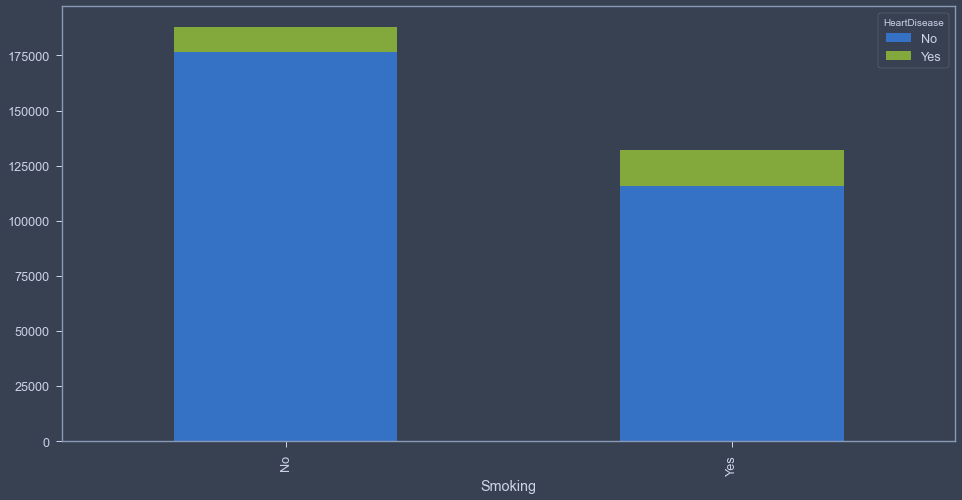

In [11]:
df.groupby(['Smoking', 'HeartDisease']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

In [12]:
df.groupby(['Smoking', 'HeartDisease']).size().unstack()

HeartDisease,No,Yes
Smoking,,
No,176551,11336
Yes,115871,16037


It is kinda obvious that those who smoke are slightly more common among those who have heart disease.

#### Alcohol Drinking 

In [13]:
df.groupby(['AlcoholDrinking', 'HeartDisease']).size().unstack()

HeartDisease,No,Yes
AlcoholDrinking,,
No,271786,26232
Yes,20636,1141


The effect of Alcohol drinking doesn't seem severe towards a person's Heart Disease, only $\frac{1141}{20636+1141} = 5.24\%$ of those who are drinking alcohol have heart disease.

#### Stroke

In [14]:
df.groupby(['Stroke', 'HeartDisease']).size().unstack()

HeartDisease,No,Yes
Stroke,,
No,284742,22984
Yes,7680,4389


This time, it appears that those who have gotten stroke before have a higher chance of getting a heart disease. Or perhaps, it's the other way around? Those who have gotten heart disease before have a higher chance to get stroke.

#### Physical Health

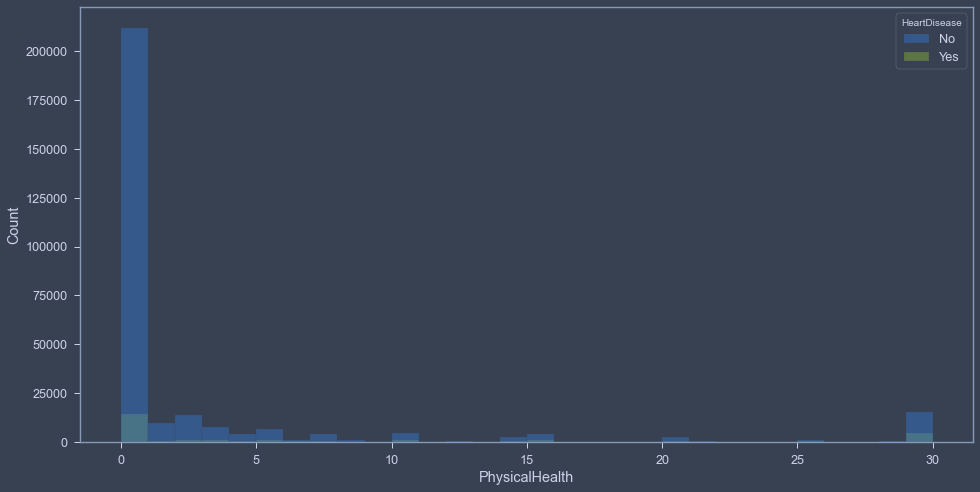

In [15]:
sns.histplot(data = df, x="PhysicalHealth", bins=30, hue = "HeartDisease")
plt.show()

#### MentalHealth

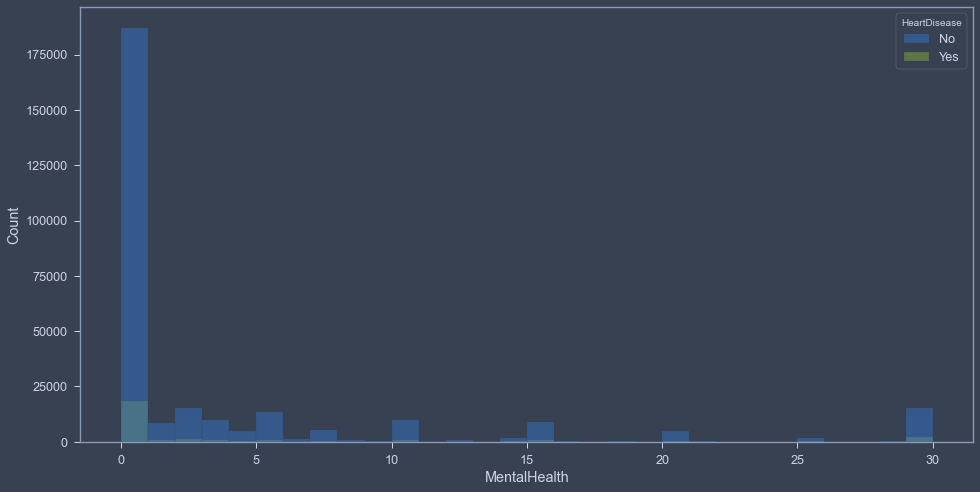

In [16]:
sns.histplot(data = df, x="MentalHealth", bins=30, hue = "HeartDisease")
plt.show()

Both of the Mental Health and Physical Health don't seem to influence the HeartDisease so much. Nevertheless, it can be seen that those who think they have a bad mental and physical health for 30 days have a higher chance of getting Heart Disease.

#### Difficulty in Walking

In [17]:
df.groupby(['DiffWalking', 'HeartDisease']).size().unstack()

HeartDisease,No,Yes
DiffWalking,,
No,258040,17345
Yes,34382,10028


Obviously, if you have difficulty in walking, it is more likely that you're having a heart disease

#### Sex

In [18]:
df.groupby(['Sex', 'HeartDisease']).size().unstack()

HeartDisease,No,Yes
Sex,,
Female,156571,11234
Male,135851,16139


There doesn't seem to be a particular effect of gender towards Heart Disease. Nevertheless, there is a higher proportion of Male $\frac{16139}{135851 + 16139} = 10.62\% > \frac{11234}{156571 + 11234} = 6.69\%$

#### Age Category
Let's look at how many unique age groups

In [19]:
len(df.AgeCategory.unique())

13

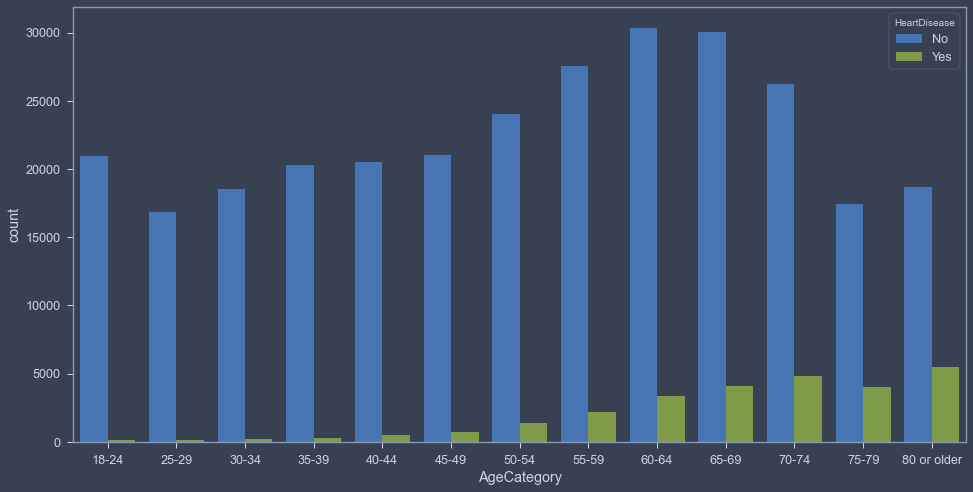

In [20]:
order = sorted(df.AgeCategory.unique(), key = lambda x: int(x[:2]))
sns.countplot(data = df, x="AgeCategory", hue = "HeartDisease", order = order)

plt.show()

As expected as well, as you grow older, you are going to have a higher risk of getting heart disease From the graph, those who aged older than 60 are considered the highest risk category.

#### Race

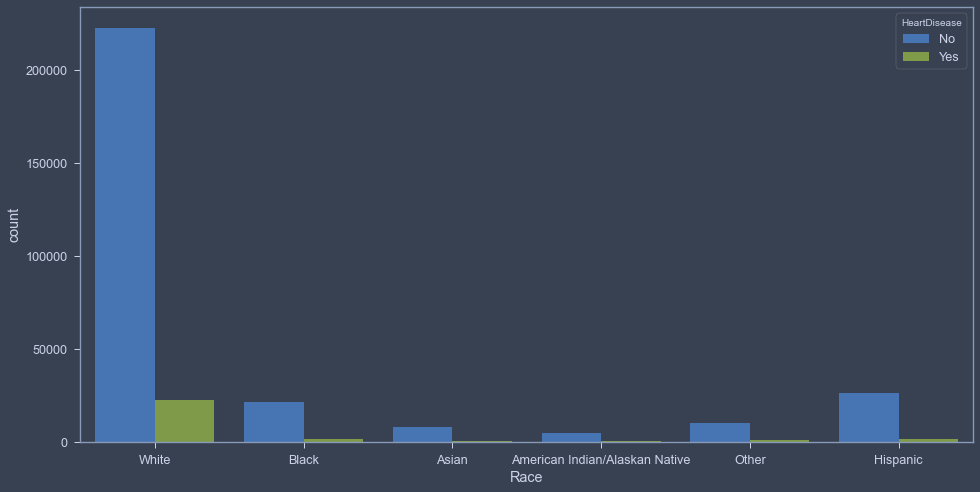

HeartDisease,No,Yes,ratio
Race,,,
American Indian/Alaskan Native,4660,542,0.104191
Asian,7802,266,0.032970
Black,21210,1729,0.075374
Hispanic,26003,1443,0.052576
Other,10042,886,0.081076
White,222705,22507,0.091786


In [21]:
sns.countplot(data = df, x="Race", hue = "HeartDisease")
plt.show()

getRatio(df.groupby(['Race', 'HeartDisease']).size().unstack())

Interestingly, Asians have the lowest rate of getting Heart Disease (I am an Asian too!), while American Indian / Alaskan Native have the highest chance.

This may be related to some race genes?

Oddly, according to this [study](https://utswmed.org/medblog/heart-disease-asian/), Asians tend to develop diabetes more easily, which leads to a higher chance of cardiovascular disease. 

#### Diabetic

In [22]:
getRatio(df.groupby(['Diabetic', 'HeartDisease']).size().unstack())

HeartDisease,No,Yes,ratio
Diabetic,,,
No,252134,17519,0.064969
"No, borderline diabetes",5992,789,0.116355
Yes,31845,8957,0.219524
Yes (during pregnancy),2451,108,0.042204


As stated in the previous section, Diabetes will lead to Heart Disease, so it is not surprising to see that those who have developed diabetes have a higher chance to get Heart Disease.

#### Physical Activity

In [23]:
getRatio(df.groupby(['PhysicalActivity', 'HeartDisease']).size().unstack())

HeartDisease,No,Yes,ratio
PhysicalActivity,,,
No,61954,9884,0.137587
Yes,230468,17489,0.070532


Nothing special here too, those who don't exercise are at a higher risk of getting Heart Disease.

#### General Health

Checking the unique values of general health first

In [24]:
df.GenHealth.unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

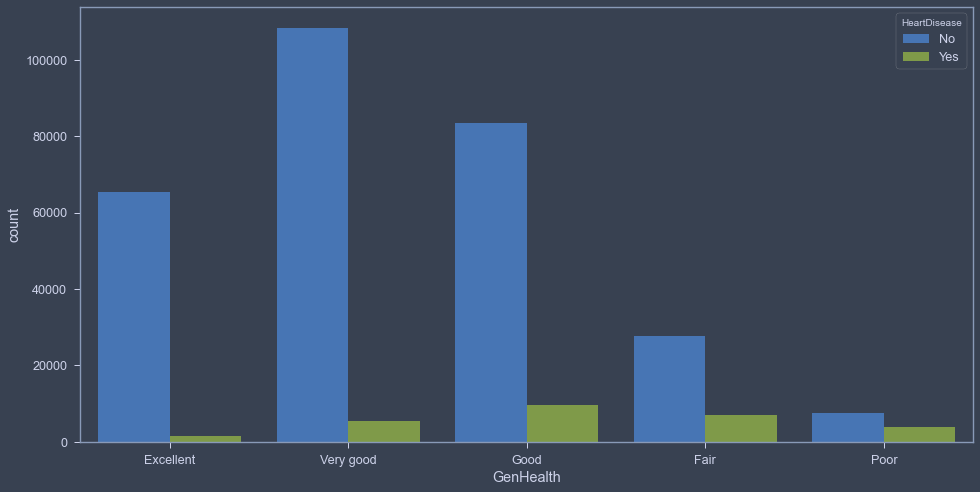

HeartDisease,No,Yes,ratio
GenHealth,,,
Excellent,65342,1500,0.022441
Fair,27593,7084,0.204285
Good,83571,9558,0.102632
Poor,7439,3850,0.341040
Very good,108477,5381,0.047261


In [25]:
order = ["Excellent", 'Very good', "Good", "Fair", "Poor"]
sns.countplot(data = df, x="GenHealth", hue = "HeartDisease", order = order)
plt.show()

getRatio(df.groupby(['GenHealth', 'HeartDisease']).size().unstack())


From a general view, it looks like people can somewhat sense their own Health rather well. Most who think that their health are poor do develop heart disease, and vice versa for those who think their health are excellent.

#### Sleep Time

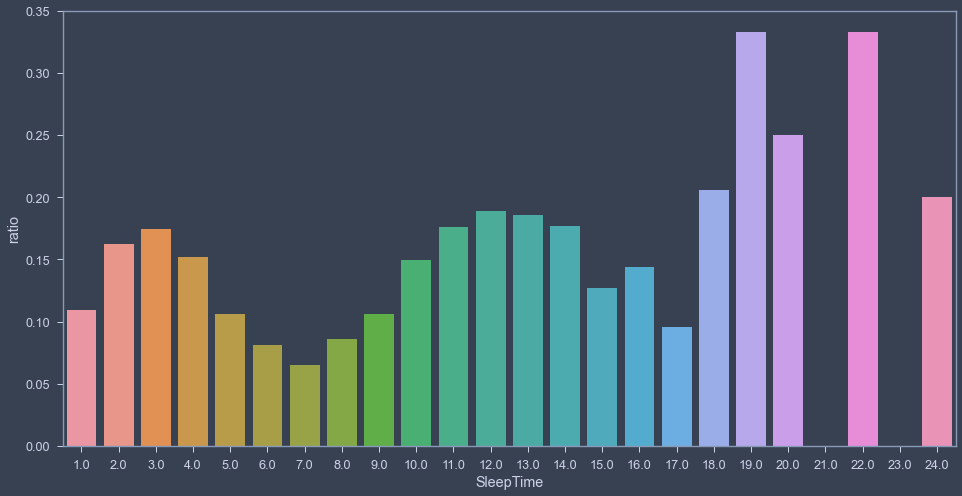

In [26]:
tmp = getRatio(df.groupby(['SleepTime', 'HeartDisease']).size().unstack())

sns.barplot(data = tmp, x = tmp.index, y = "ratio")
plt.show()

The distribution is actually rather symmetrical, with both ends having a high risk of getting heart disease, while those who sleep for _normal time_ (i.e., around 6-9 hours) tend to be safer from heart disease.

#### Asthma

In [27]:
getRatio(df.groupby(['Asthma', 'HeartDisease']).size().unstack())

HeartDisease,No,Yes,ratio
Asthma,,,
No,254483,22440,0.081033
Yes,37939,4933,0.115063


Those who have Asthma before have a slightly higher chance of getting heart disease, but again, it's not that significant. 

#### Kidney Disease

In [28]:
getRatio(df.groupby(['KidneyDisease', 'HeartDisease']).size().unstack())

HeartDisease,No,Yes,ratio
KidneyDisease,,,
No,284098,23918,0.077652
Yes,8324,3455,0.293319


Here I have finally found a **strong** indicator, Kidney Disease! According to this [article](https://www.cdc.gov/kidneydisease/publications-resources/link-between-ckd-diabetes-heart-disease.html), when an organ fails or a complication develops, there tends to be a higher risk associated to other health issues.

In this context, when the kidney fails, it'll put more stress onto the Heart, causing the heart having to pump stronger so that more blood can reach the kidney. As a result, the individual will face higher risk in developing heart disease.

#### Skin Cancer

In [29]:
getRatio(df.groupby(['SkinCancer', 'HeartDisease']).size().unstack())

HeartDisease,No,Yes,ratio
SkinCancer,,,
No,267583,22393,0.077224
Yes,24839,4980,0.167008


I didn't manage to find much online article regarding Heart Disease and Skin Cancer, however, I think it would be similar to the Kidney disease, those who have other diseases will be having a higher chance of developing other symptoms.

### Simple Models for Exploration

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score

#### One Hot Encoding
Also removing some redundant columns after encoding

In [8]:
data = pd.get_dummies(df)
data.drop(["HeartDisease_No", "Smoking_No", "AlcoholDrinking_No",
                  "Stroke_No", "DiffWalking_No", "Sex_Female", "PhysicalActivity_No",
                 "Asthma_No", "KidneyDisease_No", "SkinCancer_No"], inplace=True, axis = 1)

In [51]:
len(data.columns)

42

#### Test / Train Splitting

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'HeartDisease_Yes'],
                                            data.HeartDisease_Yes, stratify = data.HeartDisease_Yes,
                                            test_size=0.1,
                                            random_state=42)

#### Logistic Regression

In [74]:
# model = LogisticRegressionCV().fit(X_train, y_train)
# Logistic regression does not converge

#### Random Forest Classifier

In [75]:
forest_model = RandomForestClassifier(random_state = 1).fit(X_train, y_train)

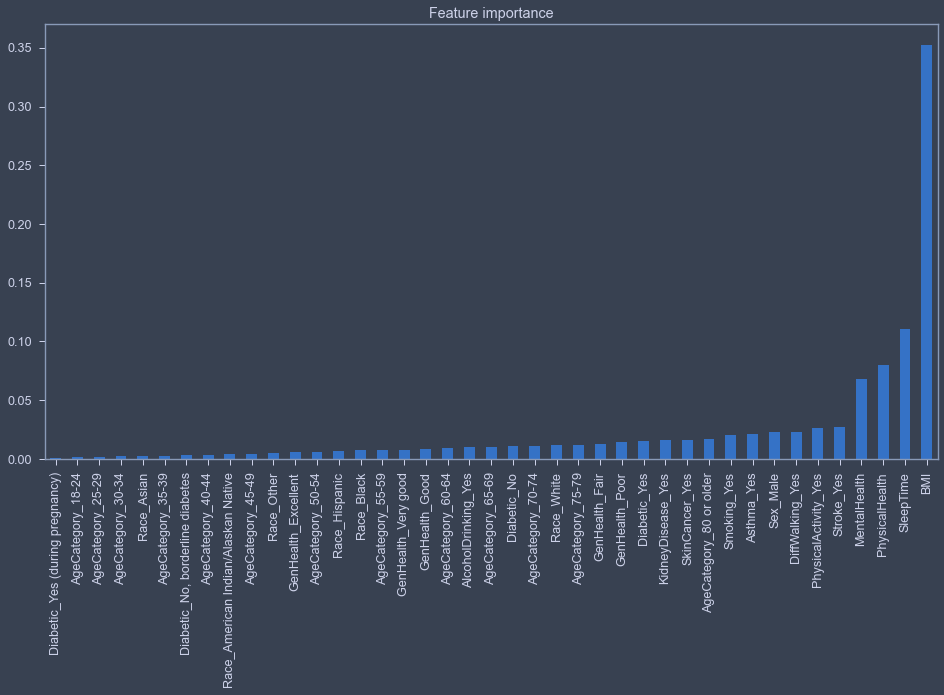

In [76]:
# Feature importance

forest_importances = pd.Series(forest_model.feature_importances_, 
                               index = forest_model.feature_names_in_)

forest_importances.sort_values().plot.bar()
plt.title("Feature importance")
plt.show()

A very quick analysis on the Feature Importance shows that BMI affect Heart Disease the most!
It is not surprising honestly, BMI is often related to various issues like Diabetes ([source](https://www.nhlbi.nih.gov/health/educational/lose_wt/risk.htm)).

Secondly, the Sleep time appears to be the second most important feature of all. As shown in the previous section, those who get very less or a lot of sleeps have a much higher risk to face heart disease.

Finally, people do be able to notice their health status from physical health and mental health aspects well. Honestly, I thought other features will have a more significant impact than mental health and physical health from the people's perspectives. 

Lastly, let's have a look on test set accuracy

In [78]:
prediction = forest_model.predict(X_test)
sum(prediction == y_test) / len(y_test)

0.9032520325203252

An astounding $90\%$ accuracy! Let's look at the confusion matrix to have a better understanding towards the prediction and the random forest's performance

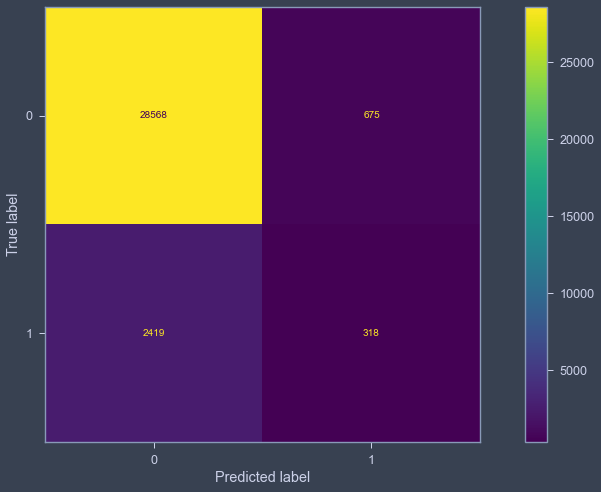

In [82]:
cm = confusion_matrix(y_test, prediction, labels=forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=forest_model.classes_)
disp.plot()
plt.show()

In [84]:
print("Precision:", precision_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))

Precision: 0.3202416918429003
Recall: 0.11618560467665327


A plain random forest model is performing rather badly, honestly. Despite the high accuracy,
the low recall rate means that the model is doing poorly in predicting those who have Heart Disease, despite performing well for predicting those who don't have Heart Disease (probably due to very imbalanced number of observations from both classes)

<br>

#### Undersampling method - One Sided Selection

In [103]:
from imblearn.under_sampling import OneSidedSelection

undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
X_train_und_oss, y_train_und_oss = undersample.fit_resample(X_train, y_train) 

In [88]:
X_train_und_oss.shape

(272170, 41)

#### Undergoes Random Forest Model again with new sample

In [89]:
forest_model = RandomForestClassifier(random_state = 1).fit(X_train_und_oss, y_train_und_oss)

In [90]:
prediction = forest_model.predict(X_test)
sum(prediction == y_test) / len(y_test)

0.9006566604127579

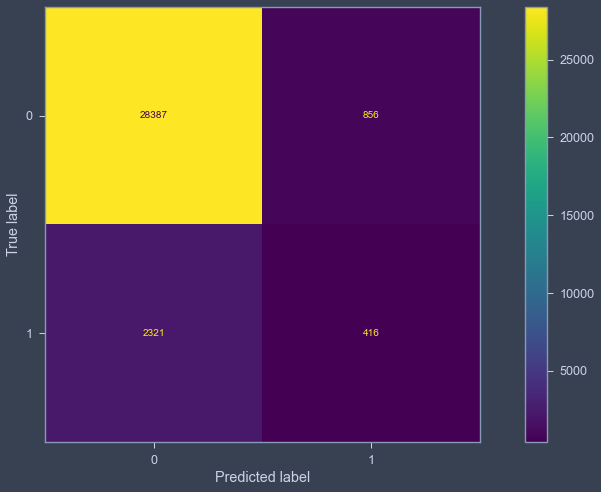

In [91]:
cm = confusion_matrix(y_test, prediction, labels=forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=forest_model.classes_)
disp.plot()
plt.show()

In [92]:
print("Precision:", precision_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))

Precision: 0.3270440251572327
Recall: 0.15199123127511874


There shows some minor improvement, but not significant, perhaps I can try another undersampling algorithm

#### Undersampling method - Near Miss

In [20]:
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=3, n_neighbors_ver3=3)
X_train_und_nm, y_train_und_nm = undersample.fit_resample(X_train, y_train) 

In [95]:
X_train_und_nm.shape

(49272, 41)

In [96]:
forest_model = RandomForestClassifier(random_state = 1).fit(X_train_und_nm, y_train_und_nm)

In [97]:
prediction = forest_model.predict(X_test)
sum(prediction == y_test) / len(y_test)

0.4561601000625391

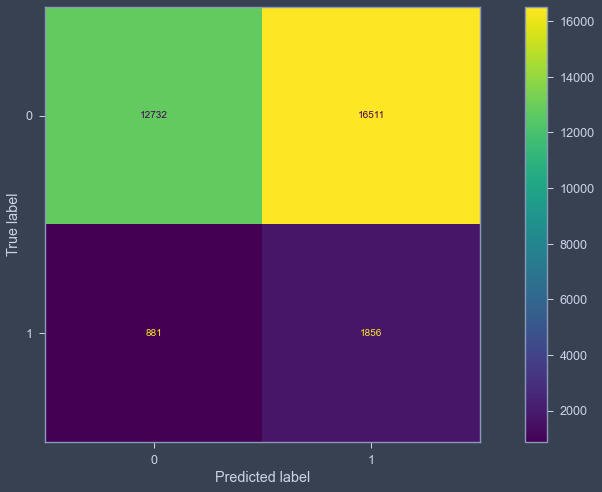

In [98]:
cm = confusion_matrix(y_test, prediction, labels=forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=forest_model.classes_)
disp.plot()
plt.show()

Unfortunately, Near Miss Undersampling Method doesn't seem to be performing very well. Let's try another tree algorithm before moving to other algorithms.

<br>

#### Adaboost

In [107]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier().fit(X_train, y_train)

In [108]:
prediction = ada_model.predict(X_test)
sum(prediction == y_test) / len(y_test)

0.9163852407754847

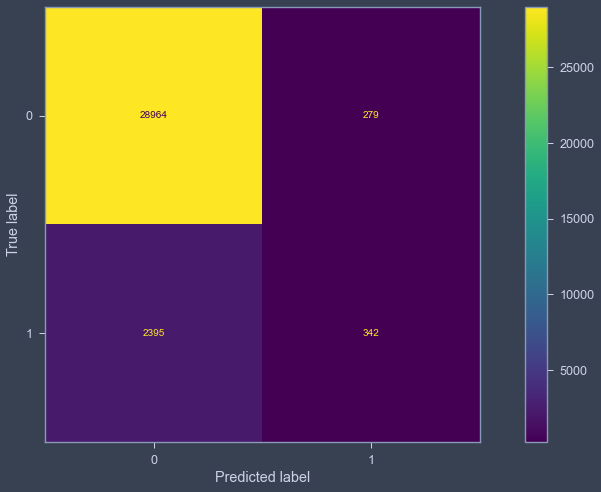

Precision: 0.5507246376811594
Recall: 0.12495432955791012


In [109]:
cm = confusion_matrix(y_test, prediction, labels=forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=forest_model.classes_)
disp.plot()
plt.show()

print("Precision:", precision_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))

Adaboost performed much better in precision than Random Forest here! However, in terms of recall, it is still very low, will the Adaboost perform better with Undersampled data?

In [110]:
ada_model = AdaBoostClassifier().fit(X_train_und_oss, y_train_und_oss)
prediction = ada_model.predict(X_test)
sum(prediction == y_test) / len(y_test)

0.9157285803627268

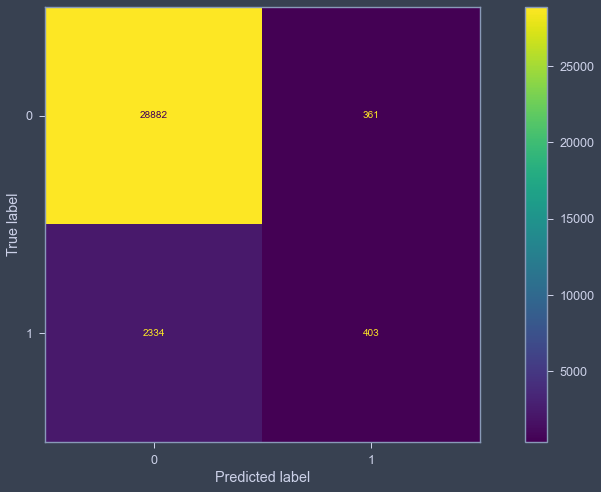

Precision: 0.5274869109947644
Recall: 0.14724150529777127


In [111]:
cm = confusion_matrix(y_test, prediction, labels=forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=forest_model.classes_)
disp.plot()
plt.show()

print("Precision:", precision_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))

Not much improvement over the recall, and even some reduction in precision. A $14.7\%$ of recall rate is really terrible, as it meant only $14.7\%$ of the heart disease patients can be detected accurately. Let's move on with some other classifiers.

<br>

#### XG Boost

In [127]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
params = {"objective":"binary:hinge",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
xg_bin = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

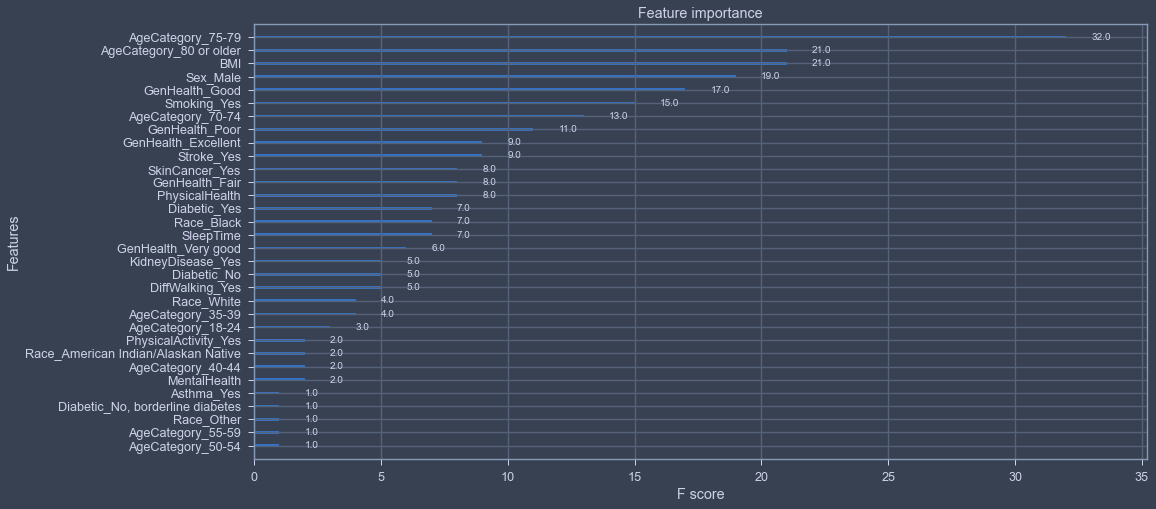

In [128]:
xgb.plot_importance(xg_reg)
plt.show()

According to XG Boost, some differences are seen. Nevertheless, non of them are significant, as age, BMI, smoking and how people think about their health do affect the Heart Disease significantly. 

In [129]:
test_dmatrix = xgb.DMatrix(data=X_test)

In [130]:
xg_prediction = xg_reg.predict(test_dmatrix)
sum(xg_prediction == y_test) / len(y_test)

0.9107879924953096

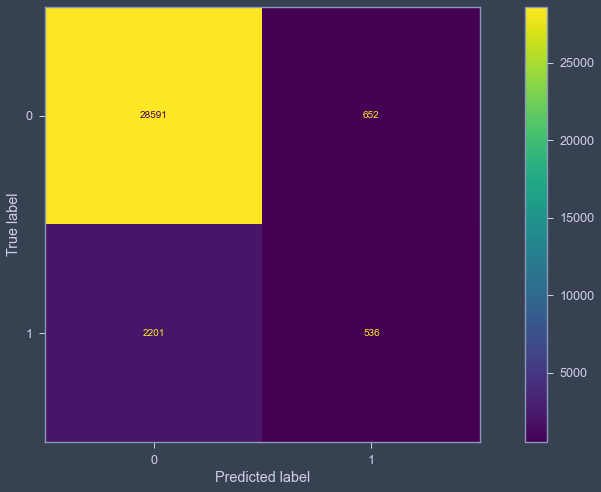

Precision: 0.4511784511784512
Recall: 0.195834855681403


In [131]:
cm = confusion_matrix(y_test, xg_prediction, labels=forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=forest_model.classes_)
disp.plot()
plt.show()

print("Precision:", precision_score(y_test, xg_prediction))
print("Recall:", recall_score(y_test, xg_prediction))

Overall, there's an improvement in recall rate but not in precision, let's try using undersampled data with some changes to params.

Accuracy: 0.9107879924953096


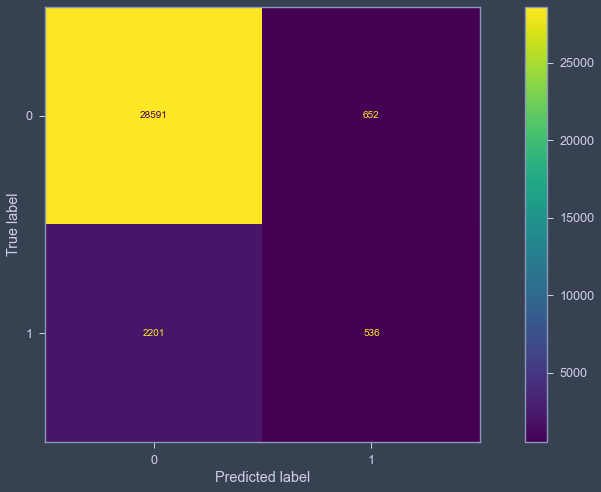

Precision: 0.4511784511784512
Recall: 0.195834855681403


In [134]:
params = {"objective":"binary:hinge",'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 10, 'alpha': 3}

data_dmatrix = xgb.DMatrix(data=X_train_und_oss,label=y_train_und_oss)
xg_bin = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=20)
xg_prediction = xg_reg.predict(test_dmatrix)
print("Accuracy:", sum(xg_prediction == y_test) / len(y_test))
cm = confusion_matrix(y_test, xg_prediction, labels=forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=forest_model.classes_)
disp.plot()
plt.show()

print("Precision:", precision_score(y_test, xg_prediction))
print("Recall:", recall_score(y_test, xg_prediction))

Somehow there's not much difference.

<br>

## Conclusion

It appears that due to limited number of patients who have heart disease, the precision and recall rate of the supervised machine learning aren't that impressive. Nevertheless, using other types of techniques such as **Gaussian Process** and **SVM** either will take too much time or too much space because of the size of the dataset. 

Furthermore, using techniques like Logistic Regression didn't help as well because the learning didn't converge. As a result, I will assume that the data distribution is nonlinear. 

Overall, the machine learning project done here is rather disappointing despite of high accuracy. Out of all models, XG Boost tree has performed the best.